# Support Vector Regression

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the data

In [2]:
data = pd.read_csv('/content/Position_Salaries.csv')
x = data.iloc[: , 1:-1].values
y = data.iloc[: , -1].values

In [3]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [6]:
y = y.reshape(len(y) , 1)

In [7]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [14]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [13]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #rbf kernel is recommended when experimenting with svr
regressor.fit(x , y)
regressor.score(x , y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7516001070620798

## Predicting a new result

In [19]:
scaled_value = regressor.predict(sc_x.transform([[6.5]])) #scale this value using the scalar applied on x

In [21]:
# reverse the scaling on the predicted value to get the true value
sc_y.inverse_transform([scaled_value])

array([[170370.0204065]])

## Visualising the SVR results

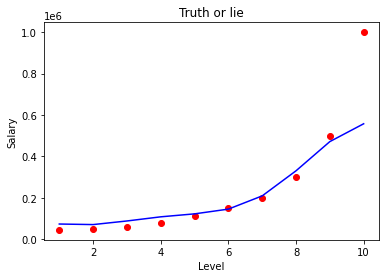

In [29]:
predictions = regressor.predict(x).reshape(-1,1)
plt.scatter(sc_x.inverse_transform(x) , sc_y.inverse_transform(y) , color='red')
plt.plot( sc_x.inverse_transform(x) , sc_y.inverse_transform(predictions) , color ='blue')
plt.title('Truth or lie')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()